<a href="https://colab.research.google.com/github/entanglement-nak/portfolio-nak/blob/main/feature_importances%E3%83%BB%E6%AD%A3%E5%B8%B8%E3%83%BB%E7%95%B0%E5%B8%B8%E3%81%AE%E5%8F%AF%E8%A6%96%E5%8C%96%E3%80%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# データパス
train_path = r"/content/drive/MyDrive/Wafer/Wafer_TRAIN.xlsx"

test_path = r"/content/drive/MyDrive/Wafer/Wafer_TEST.xlsx"

In [10]:
train_df = pd.read_excel(train_path, header=None)

test_df = pd.read_excel(test_path, header=None)

In [11]:
# トレインデータとテストデータを縦に統合（スタック）
combined_data = pd.concat([train_df, test_df], axis=0)

In [12]:
# 統合されたデータの確認
print(combined_data.head())

   0         1         2         3         4         5         6         7    \
0    1 -1.602294 -1.670823 -1.693666 -1.699377 -1.699377 -1.703660 -1.703660   
1    1  1.084591  1.084591  1.084591  1.065308  1.065308  1.065308  1.065308   
2    1  0.362689  0.362689  0.362689  0.393316  0.362689  0.362689  0.362689   
3    1 -1.094523 -1.094523 -1.094523 -1.096732 -1.094523 -1.096732 -1.094523   
4    1 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761   

        8         9    ...       143       144       145       146       147  \
0 -1.703660 -1.703660  ... -1.145432 -1.145432 -1.145432 -1.145432 -1.145432   
1  1.065308  1.065308  ...  1.065308  1.065308  1.065308  1.065308  1.065308   
2  0.362689  0.362689  ...  0.393316  0.393316  0.393316  0.362689  0.393316   
3 -1.094523 -1.094523  ... -1.096732 -1.096732 -1.096732 -1.096732 -1.096732   
4 -1.103761 -1.103761  ... -1.103761 -1.103761 -1.103761 -1.103761 -1.103761   

        148       149       150       

In [13]:
# 正常と異常のカテゴリを決定
normal_label = 1 if combined_data.iloc[:, 0].value_counts()[1] >= combined_data.iloc[:, 0].value_counts()[-1] else -1
abnormal_label = -1 if normal_label == 1 else 1

In [14]:
# 正常波形と異常波形のデータを分ける
normal_data = combined_data[combined_data.iloc[:, 0] == normal_label]
abnormal_data = combined_data[combined_data.iloc[:, 0] == abnormal_label]

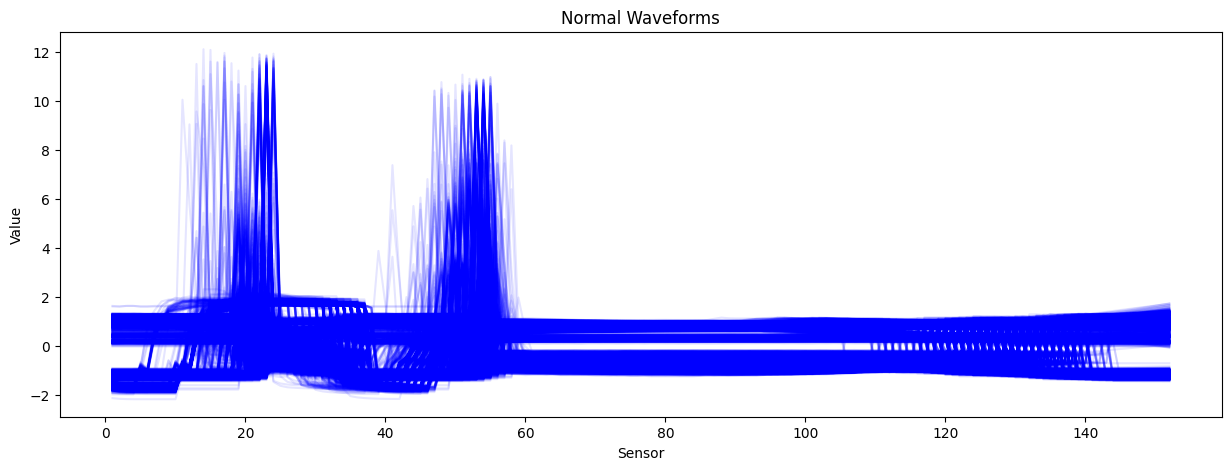

In [15]:
# 正常波形の可視化（青色）
plt.figure(figsize=(15, 5))
for _, row in normal_data.iterrows():
    plt.plot(row[1:], color='blue', alpha=0.1)  # alphaを設定して重なりを見やすくする
plt.title('Normal Waveforms')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.show()

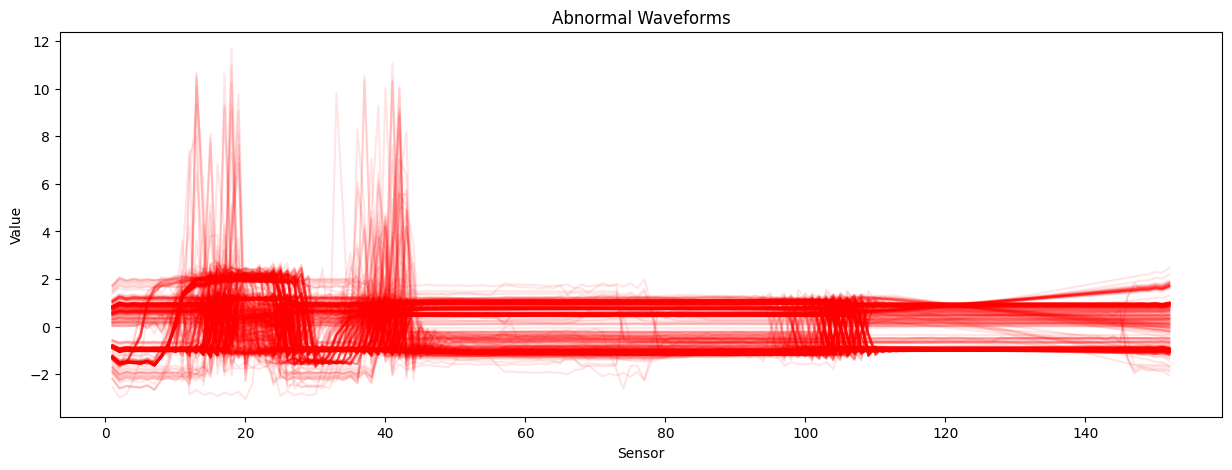

In [16]:
# 異常波形の可視化（赤色）
plt.figure(figsize=(15, 5))
for _, row in abnormal_data.iterrows():
    plt.plot(row[1:], color='red', alpha=0.1)  # alphaを設定して重なりを見やすくする
plt.title('Abnormal Waveforms')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.show()

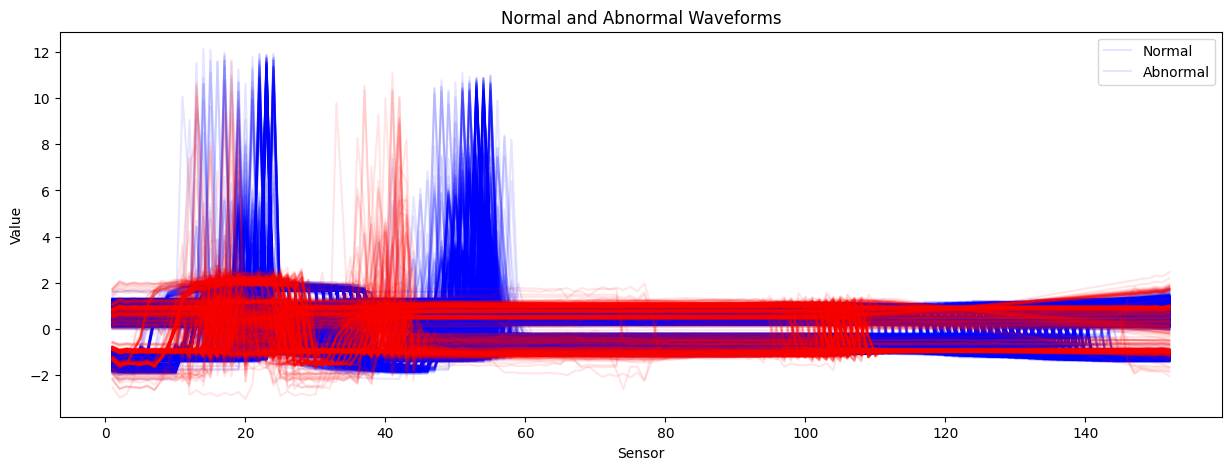

In [17]:
# 正常波形と異常波形を重ねて表示する
plt.figure(figsize=(15, 5))

# 正常波形のプロット（青色）
for _, row in normal_data.iterrows():
    plt.plot(row[1:], color='blue', alpha=0.1)

# 異常波形のプロット（赤色）
for _, row in abnormal_data.iterrows():
    plt.plot(row[1:], color='red', alpha=0.1)

plt.title('Normal and Abnormal Waveforms')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.legend(['Normal', 'Abnormal'])
plt.show()

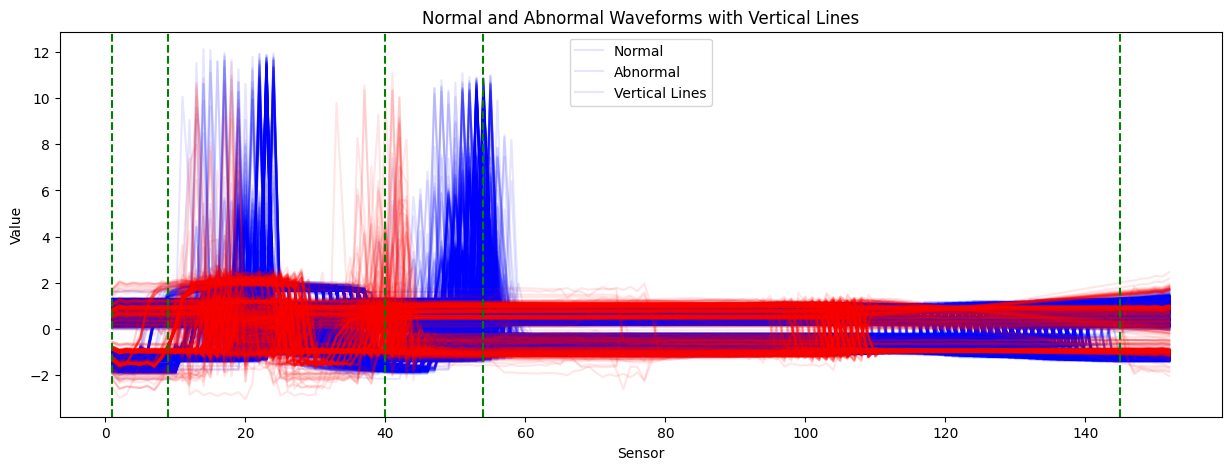

In [21]:
#モデルがどの特徴量に基づいて予測を行っているか可視化

# 正常波形と異常波形を重ねて表示する
plt.figure(figsize=(15, 5))

# 正常波形のプロット（青色）
for _, row in normal_data.iterrows():
    plt.plot(row[1:], color='blue', alpha=0.1)

# 異常波形のプロット（赤色）
for _, row in abnormal_data.iterrows():
    plt.plot(row[1:], color='red', alpha=0.1)

# 指定された列に緑色の垂直線を追加
for x in [9, 1, 145, 54, 40]:
    plt.axvline(x=x, color='green', linestyle='--')

plt.title('Normal and Abnormal Waveforms with Vertical Lines')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.legend(['Normal', 'Abnormal', 'Vertical Lines'])
plt.show()